# T56 Engine Performance 1010°C (Turbine Inlet Temperature)
## 1010°C (Turbine Inlet Temperature) and 13820±70 RPM

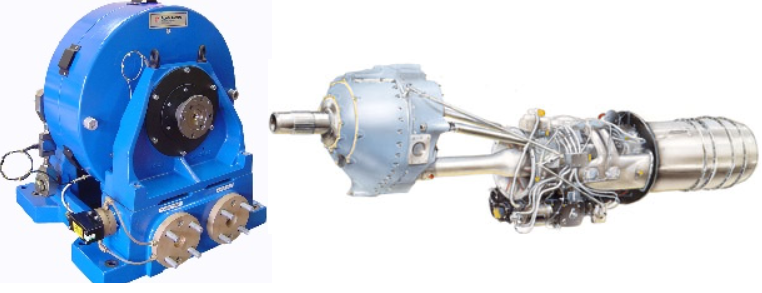

In [9]:
Image(filename='D:\\Python Projects\\T56\\t56.png') 

In [1]:
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
import numpy as np
import pandas as pd
from pandas import *
from pandas import Series, DataFrame
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics
import os
from IPython.display import Image
from scipy import stats
import seaborn as sns
from pandas import *

D:\Program Files (x86)\Anaconda\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [83]:
df=pd.read_csv('D:\\Python Projects\\T56\\T56_1.csv')
df.head()

,PLC_DYN_FW_BRG_T,Compressor_vib,NG,N_prop,PCA,Fuel_disc_P,PHEG,OilP_RGB,PHGG,PHGR,...,THR,Oil_OLTemp_Power,GearBx_OilOL_T,TIT,TMHP,Torque,Tur_ver_vib,TVV_Hz,Performance,RPM
0,15.859245,0.248673,13738.01367,1020.61615,4.702017,422.518890,67.689079,206.597611,18.863905,17.696125,...,68.975571,113.396523,88.201889,1008.186890,3860.731690,17250.43555,0.198814,16.604446,MEDIUM,MEDIUM
1,15.784944,0.328379,13739.79492,1020.61615,4.702019,422.493042,67.691559,206.674545,18.863255,17.697664,...,69.430382,113.505127,88.437569,1008.156311,3868.884277,17272.07422,0.242940,18.004704,MEDIUM,MEDIUM
2,15.962008,0.239817,13740.04102,1020.61615,4.701285,418.970123,67.700073,206.721008,18.862593,17.697458,...,69.106964,113.044884,87.827911,1008.095459,3878.068115,17376.36914,0.251765,17.507244,MEDIUM,MEDIUM
3,15.983412,0.319523,13746.09082,1020.61615,4.679303,424.217987,67.842621,208.285080,18.859264,17.645344,...,67.363533,113.365494,87.940613,1010.113342,3884.978516,17859.11914,0.251765,18.437679,HIGH,MEDIUM
4,15.512342,0.222104,13746.69141,1020.61615,4.702265,423.187347,66.030014,207.623947,18.869408,17.702124,...,68.076065,112.993179,88.924355,1010.644775,3911.416748,17471.49609,0.225290,15.112068,MEDIUM,MEDIUM


In [11]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [10]:
df.dtypes #Data types of Attributes

PLC_DYN_FW_BRG_T       float64
CLV                    float64
NG                     float64
N_prop                 float64
PCA                    float64
PCARBRU                float64
PHEG                   float64
PHER                   float64
PHGG                   float64
PHGR                   float64
PHPR                   float64
PHRG                   float64
PHRR                   float64
PLC_DYN_AFT_BRG_T      float64
PLC_DYN_FW_BRG_T       float64
PLC_DYN_INLET_POS      float64
PLC_DYN_OUTLET_POS     float64
PLC_DYN_SPEED          float64
PLC_WIP                float64
Water_ILTemp           float64
Water_OLtemp           float64
PS3                    float64
PSUMP                  float64
FlowQ                  float64
QHG                    float64
QHR                    float64
RGLV                   float64
THG                    float64
THR                    float64
THSG                   float64
THSR                   float64
TIT                    float64
TMHP    

### Turbine Vertical Vibration (15Hz Filter)

In [11]:
df.TVV_Hz.describe()

count    1198.000000
mean       15.464785
std         2.454701
min         7.760716
25%        13.905268
50%        15.545042
75%        17.055845
max        24.646715
Name: TVV_Hz, dtype: float64

In [12]:
df.Performance.value_counts().sort_index()
# Engine Torque in lbf.in

HIGH      429
LOW       195
MEDIUM    574
dtype: int64

In [13]:
# Feature that yield the Max Torque
df.Torque.max()

18552.12109

## Dynamometer Shaft Torque

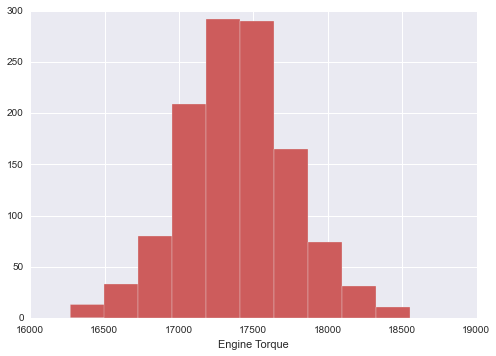

In [14]:
df.Torque.hist(color='indianred')
plt.xlabel('Engine Torque')

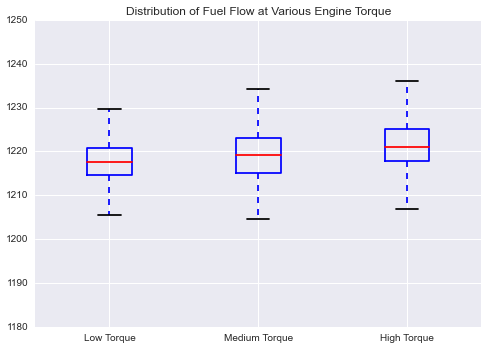

In [15]:
plt.boxplot([[df.FlowQ[df.Performance=='LOW']],[df.FlowQ[df.Performance=='MEDIUM']],
             [df.FlowQ[df.Performance=='HIGH']]],
           labels=('Low Torque','Medium Torque','High Torque'))
plt.title('Distribution of Fuel Flow at Various Engine Torque')

## Distribution of Rear and Front Bearing Temperature (PR 5131 Thermocouple)

(array([ 0.36032908,  0.11767504,  0.1452678 ,  0.09170537,  0.23453852,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.02272346]),
 array([ 42.8660965 ,  43.89464989,  44.92320328,  45.95175667,
         46.98031006,  48.00886345,  49.03741684,  50.06597023,
         51.09452362,  52.12307701,  53.1516304 ,  54.18018379,
         55.20873718,  56.23729057,  57.26584396,  58.29439735,
         59.32295074,  60.35150413,  61.38005752,  62.40861091,  63.4371643 ]),
 <a list of 20 Patch objects>)

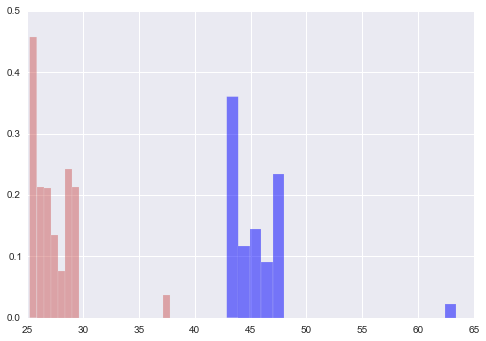

In [16]:
plt.hist(df.PLC_DYN_AFT_BRG_T,normed=True,color='indianred',alpha=0.5,bins=20)
plt.hist(df.PLC_DYN_FW_BRG_T,normed=True,color='blue',alpha=0.5,bins=20)

## Joint Plot of RPM vs Torquemeter Horsepower

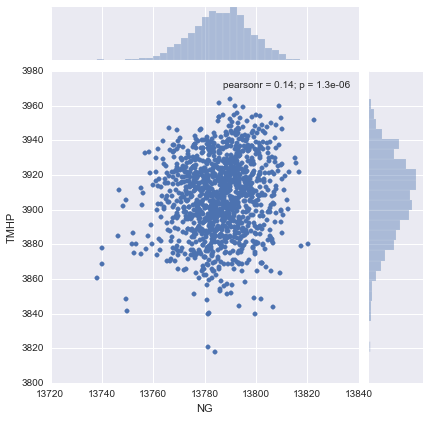

In [17]:
sns.jointplot(df.NG,df.TMHP)

### Kernel Density Plot of Torque 

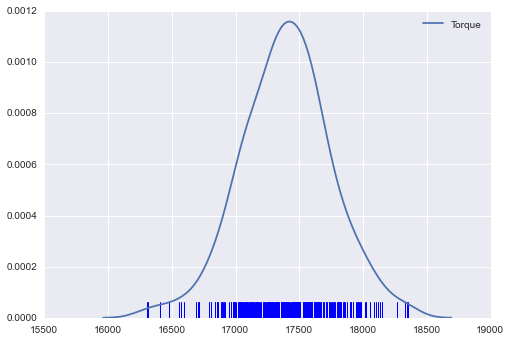

In [18]:
sns.rugplot(df.Torque[450:750])
sns.kdeplot(df.Torque[450:750])

## Cumulative distribution function Plot of Turbine vertical Vibration (mils)

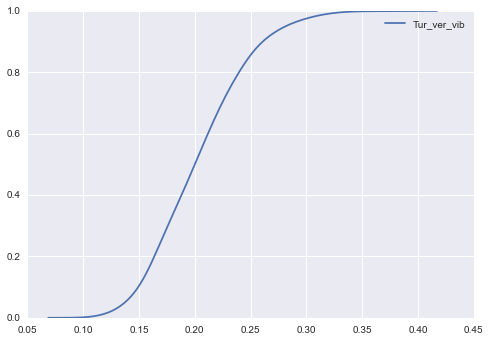

In [19]:
sns.kdeplot(df.Tur_ver_vib,cumulative=True)

## Linear Regression Fit

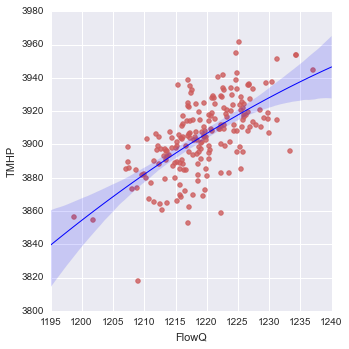

In [27]:
sns.lmplot('FlowQ','TMHP',df[450:650],order=2,
          scatter_kws={'linewidth':1,'color':'indianred'},
          line_kws={'linewidth':1,'color':'blue'})
#Quadratic Fit using seaborn

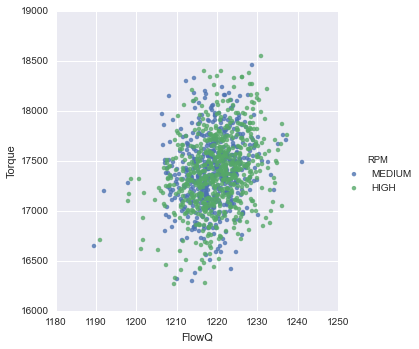

In [67]:
sns.lmplot('FlowQ','Torque',df,hue='RPM',fit_reg=False)

## Torquemeter Horsepower vs Fuel Flow at various RPM

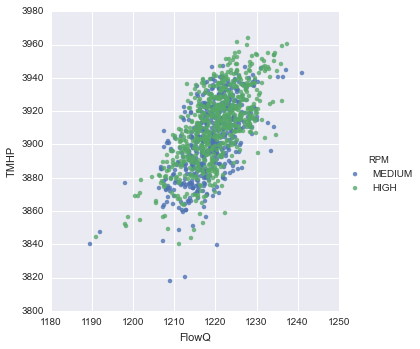

In [100]:
sns.lmplot('FlowQ','TMHP',df,hue='RPM',fit_reg=False)

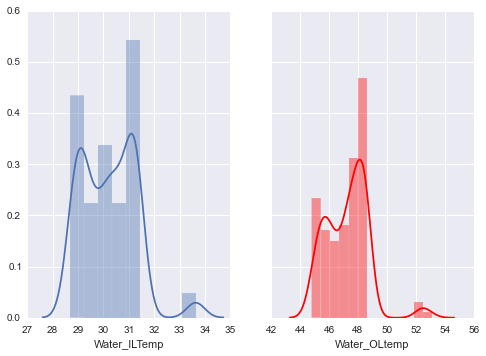

In [40]:
fig, (axis1,axis2)=plt.subplots(1,2,sharey=True)
sns.distplot(df.Water_ILTemp[400:700],ax=axis1)
sns.distplot(df.Water_OLtemp[400:700],color='red',ax=axis2)

## Creating New Features

In [3]:
def male(TT):
    PLC_DYN_FW_BRG_T,Water_OLtemp=TT
    if PLC_DYN_FW_BRG_T>55 and Water_OLtemp>49:
        return 'HighT'
    else:
        return 'MediumT'
# We'll define a new column called 'DynoT',  axis=1 for columns and not index
df['DynoT'] = df[['PLC_DYN_FW_BRG_T','Water_OLtemp']].apply(male,axis=1)

In [5]:
df.tail()

,PLC_DYN_FW_BRG_T,Compressor_vib,NG,N_prop,PCA,Fuel_disc_P,PHEG,OilP_RGB,PHGG,PHGR,...,Oil_OLTemp_Power,THSR,TIT,TMHP,Torque,Tur_ver_vib,TVV_Hz,Performance,RPM,DynoT
1193,14.937502,0.292954,13815.48730,1022.06665,4.693778,425.543488,67.975784,209.254364,19.025270,17.627205,...,113.060402,87.904747,1011.233643,3927.058350,17802.55469,0.225290,17.295364,HIGH,HIGH,MediumT
1194,15.333413,0.195536,13816.71582,1022.06665,4.693650,426.139496,68.000069,208.973496,19.027883,17.628071,...,113.406868,88.698883,1011.482422,3921.626221,17833.69336,0.216464,17.617792,HIGH,HIGH,MediumT
1195,15.877297,0.275242,13817.57617,1022.06665,4.774053,419.028351,67.097687,207.533066,18.886131,17.642324,...,115.605514,90.308228,1008.149292,3878.796387,17176.20117,0.225290,15.545042,MEDIUM,HIGH,HighT
1196,15.563894,0.346092,13820.30664,1022.06665,4.774417,419.169403,67.103744,207.665314,18.882610,17.642096,...,115.393341,90.508171,1008.109009,3880.229004,17113.44141,0.242940,15.397647,MEDIUM,HIGH,HighT
1197,14.603327,0.266385,13822.45898,1022.06665,4.711717,425.811096,68.045212,206.343597,18.869597,17.761709,...,111.054726,87.653740,1011.042908,3951.551270,17070.26172,0.172338,17.488819,MEDIUM,HIGH,MediumT


## Kernel Density Estimation (Torque at Dynamometer Conditions)

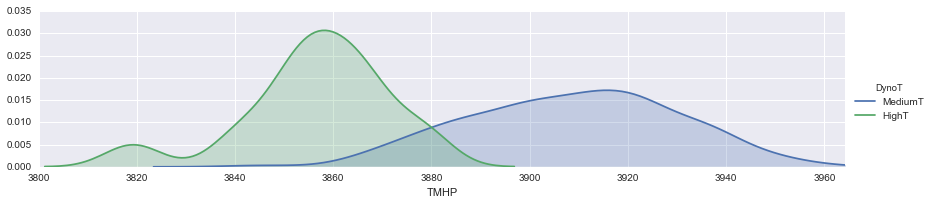

In [8]:
fig=sns.FacetGrid(df,hue='DynoT',aspect=4)
fig.map(sns.kdeplot,'TMHP',shade=True)
od=df['TMHP'].max()
fig.set(xlim=(3800,od))
fig.add_legend()

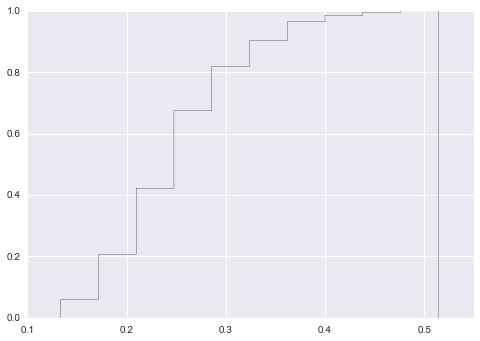

In [21]:
df['Compressor_vib'].hist(cumulative=True,normed=True,histtype='step',color='black')

### Simulating the Distribution of Dynamometer Water O/L Temp as Continuous Unifrom  Distribution

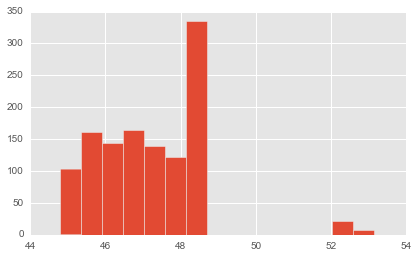

In [47]:
df.Water_OLtemp.hist(bins=15)

In [81]:
a=df.Water_ILTemp.min()
b=df.Water_ILTemp.max()
fx=1.0/(b-a)
print 'The probability density function is %1.3f'%fx
var=((b-a)**2)/12
print 'The variance of the continuous uniform function is %1.3f'%var

The probability density function is 0.201
The variance of the continuous uniform function is 2.054


## Manual Normal Distribution

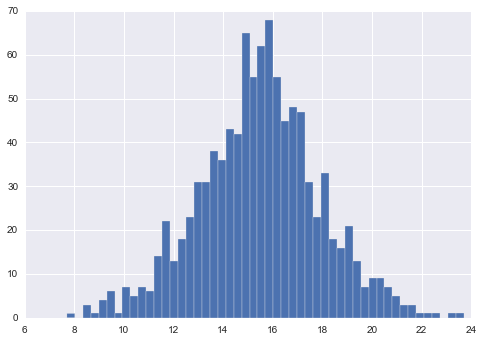

In [8]:
mu=df.TVV_Hz.mean()
sigma=df.TVV_Hz.std()
val=np.random.normal(mu,sigma,1000)
plt.hist(val,50)
plt.show()


In [9]:
df.describe()

,PLC_DYN_FW_BRG_T,Compressor_vib,NG,N_prop,PCA,Fuel_disc_P,PHEG,OilP_RGB,PHGG,PHGR,...,RGLV,THG,THR,Oil_OLTemp_Power,THSR,TIT,TMHP,Torque,Tur_ver_vib,TVV_Hz
count,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,...,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000
mean,15.319867,0.264722,13785.955536,1020.985437,4.685246,425.396141,67.336008,208.010105,18.914419,17.671871,...,1.025837,67.497091,68.334153,112.999623,88.441159,1010.332307,3907.490698,17390.062020,0.202961,15.464785
std,0.318444,0.066539,11.857328,0.794740,0.021672,2.361382,0.655411,1.453491,0.074128,0.053736,...,0.264007,1.159829,1.668671,0.811436,0.572387,1.163203,22.647820,364.225905,0.042871,2.454701
min,14.306775,0.133542,13738.013670,1017.715210,4.608314,414.597931,66.003097,204.409424,18.851606,17.581982,...,0.479585,64.981323,64.644798,110.625847,86.655006,1008.004944,3817.910645,16269.185550,0.101736,7.760716
25%,15.124688,0.213248,13778.675537,1020.616150,4.670298,423.842682,66.826601,207.111195,18.860174,17.625917,...,0.832115,66.608358,66.888512,112.703628,88.078934,1009.438110,3892.264038,17153.964843,0.172338,13.905268
50%,15.332426,0.257529,13786.563965,1020.616150,4.688161,425.507507,67.714039,207.870773,18.869840,17.660572,...,0.990753,67.476284,68.391903,113.122452,88.440132,1010.545532,3909.121704,17385.870115,0.198814,15.545042
75%,15.535181,0.301810,13793.442872,1022.066650,4.701118,427.104576,67.847239,209.397511,19.013471,17.701205,...,1.191255,68.260704,69.400063,113.417213,88.837242,1011.383926,3923.470704,17616.363282,0.234115,17.055845
max,16.302275,0.514360,13822.458980,1023.517090,4.774417,432.257324,68.200203,211.011826,19.047605,17.798492,...,1.880891,70.705048,72.902077,116.355987,90.508171,1011.995606,3964.200195,18552.121090,0.384144,24.646715


## Scatter Matrix

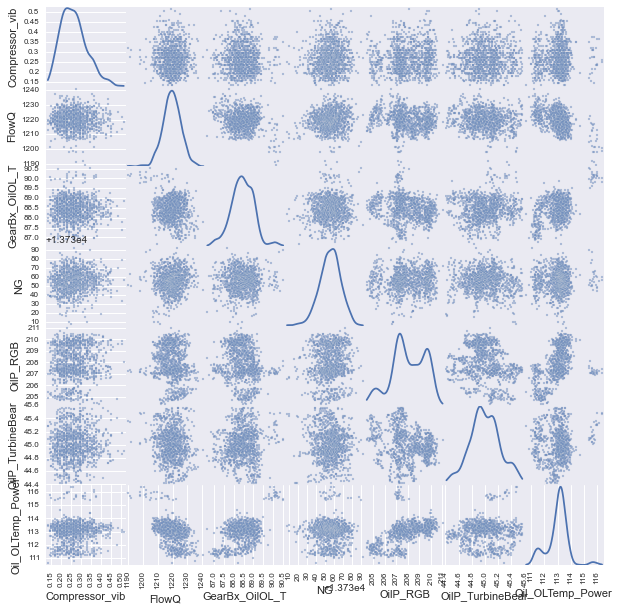

In [35]:
predictor1=df[['Compressor_vib','FlowQ', 'GearBx_OilOL_T', 'NG',
                      'OilP_RGB', 'OilP_TurbineBear', 'Oil_OLTemp_Power']]

from pandas.tools.plotting import scatter_matrix
plot =scatter_matrix(predictor1,diagonal='kde',figsize=(10,10))

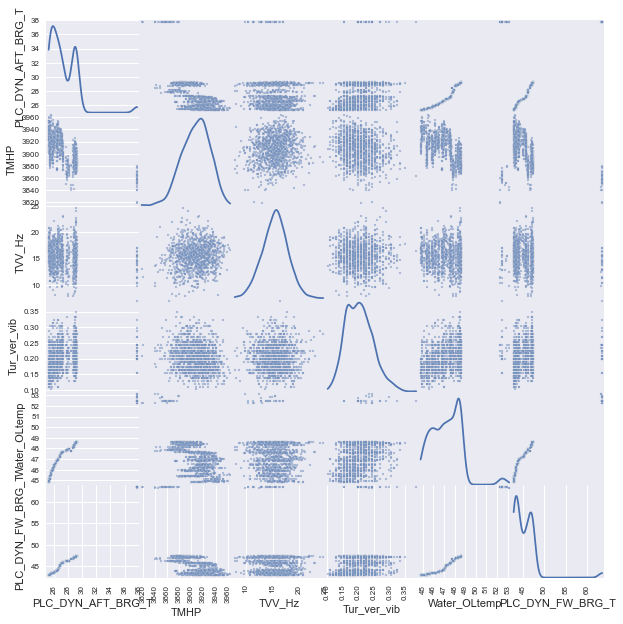

In [5]:
predictor2=df[['PLC_DYN_AFT_BRG_T','RPM', 'TMHP', 'TVV_Hz',
                      'Tur_ver_vib', 'Water_OLtemp', 'PLC_DYN_FW_BRG_T']]

plot =scatter_matrix(predictor2,diagonal='kde',figsize=(10,10))

## Third and Fourth Moments of Reduction GearBox Oil outlet Temperature

In [15]:
df.GearBx_OilOL_T.skew() #Third Moments, Data is little positively skewed

0.079908332912884197

In [17]:
df.GearBx_OilOL_T.kurtosis() #Value shows that the distribution is less outlier-prone

0.75792462512288739

## Linear Regression (Horsepower and Fuel Flow)
## Ordinary Least Square Regression

(2.3785105524741597, 1006.831308583689, 0.65292377320976158, 1.7254221243903723e-146, 0.079784009488578916)


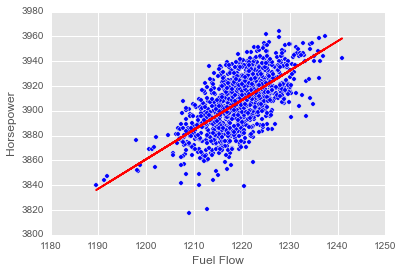

In [40]:
from scipy import stats

slope,intercept,r_value,p_value,std_err=stats.linregress(df.FlowQ,df.TMHP)
print(slope,intercept,r_value,p_value,std_err)

def predict(x):
    return slope*x + intercept
fitline=predict(df.FlowQ)#Using x-axis values
plt.scatter(df.FlowQ,df.TMHP,)
plt.plot(df.FlowQ,fitline,c='r')
plt.xlabel('Fuel Flow')
plt.ylabel('Horsepower')
plt.show()

## 3rd Order Polynomial Regression

In [71]:
predictors=df.FlowQ
target=df.TMHP
pred_train,pred_test,tar_train,tar_test=train_test_split(predictors,target,test_size=.3)

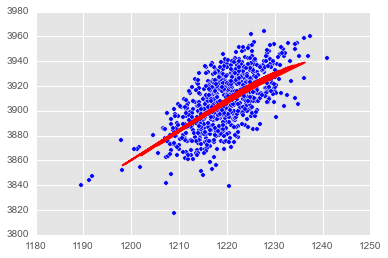

0.4170854072765261

In [85]:
x=np.array(pred_train)
y=np.array(tar_train)
p3=np.poly1d(np.polyfit(x,y,3))
plt.scatter(x,y)
plt.plot(pred_test,p3(pred_test),c='r')
plt.show()
from sklearn.metrics import r2_score
r2=r2_score(tar_test,p3(pred_test))
r2 #R2 score is pretty low

## K-Means Clustering -------- No of Clusters=3
## Reduction GearBox Oil Pressure vs Oil Outlet Temperature Power Section

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from numpy import random, float
data1=np.array([df.OilP_RGB,df.Oil_OLTemp_Power])
data1=data1.T

In [9]:
from sklearn import cluster

k = 3
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(data1)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_
print (labels)
print (centroids)

[0 0 0 ..., 0 0 2]
[[ 207.45951221  113.23528058]
 [ 209.45650633  113.33352747]
 [ 205.99415435  111.72588724]]


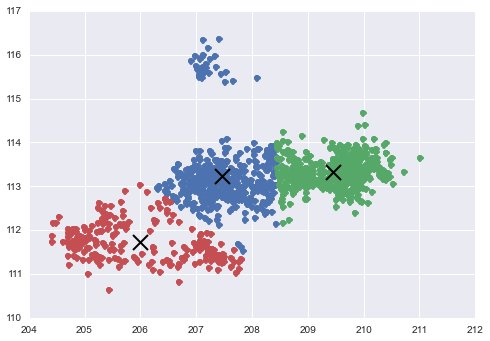

In [10]:
for i in range(k):
    # select only data observations with cluster label == i
    ds = data1[np.where(labels==i)]
    # plot the data observations
    plt.plot(ds[:,0],ds[:,1],'o')
    # plot the centroids
    lines = plt.plot(centroids[i,0],centroids[i,1],'kx')
    # make the centroid x's bigger
    plt.setp(lines,ms=15.0)
    plt.setp(lines,mew=2.0)
plt.show()

In [32]:
from sklearn import tree
feature=list([df.NG, df.Water_OLtemp, df.FlowQ])
feature
y=df['Performance']
X=df[feature]
clf=tree.DecisionTreeClassifier()
clf=clf.fit(X,y)

TypeError: 'Series' objects are mutable, thus they cannot be hashed

In [109]:
dm = {'LOW': 0,'MEDIUM':1, 'HIGH':2}
df['Performance'] = df['Performance'].map(dm)
y=df.Performance
y=y.T

In [110]:
data2=np.array([df.Water_ILTemp,df.PLC_DYN_FW_BRG_T])
data2=data2.T
df.head()

,PLC_DYN_FW_BRG_T,Compressor_vib,NG,N_prop,PCA,Fuel_disc_P,PHEG,OilP_RGB,PHGG,PHGR,...,THR,Oil_OLTemp_Power,GearBx_OilOL_T,TIT,TMHP,Torque,Tur_ver_vib,TVV_Hz,Performance,RPM
0,15.859245,0.248673,13738.01367,1020.61615,4.702017,422.518890,67.689079,206.597611,18.863905,17.696125,...,68.975571,113.396523,88.201889,1008.186890,3860.731690,17250.43555,0.198814,16.604446,1,0
1,15.784944,0.328379,13739.79492,1020.61615,4.702019,422.493042,67.691559,206.674545,18.863255,17.697664,...,69.430382,113.505127,88.437569,1008.156311,3868.884277,17272.07422,0.242940,18.004704,1,0
2,15.962008,0.239817,13740.04102,1020.61615,4.701285,418.970123,67.700073,206.721008,18.862593,17.697458,...,69.106964,113.044884,87.827911,1008.095459,3878.068115,17376.36914,0.251765,17.507244,1,0
3,15.983412,0.319523,13746.09082,1020.61615,4.679303,424.217987,67.842621,208.285080,18.859264,17.645344,...,67.363533,113.365494,87.940613,1010.113342,3884.978516,17859.11914,0.251765,18.437679,2,0
4,15.512342,0.222104,13746.69141,1020.61615,4.702265,423.187347,66.030014,207.623947,18.869408,17.702124,...,68.076065,112.993179,88.924355,1010.644775,3911.416748,17471.49609,0.225290,15.112068,1,0


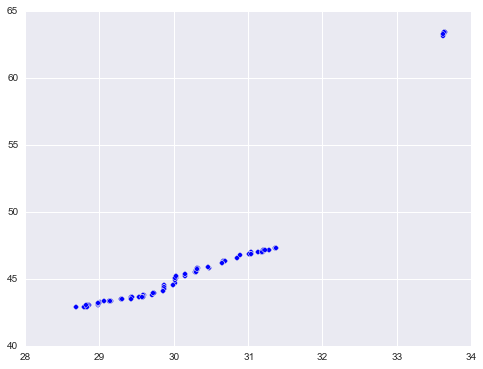

In [111]:
plt.figure(figsize=(8, 6))
plt.scatter(data2[:,0], data2[:,1])
plt.show()

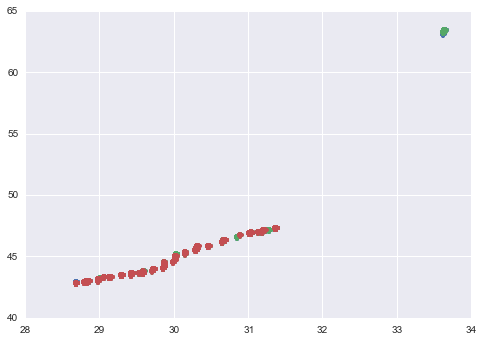

In [113]:
for i in range(3):
    # select only data observations with cluster label == i
    ds = data2[np.where(y==i)]
    # plot the data observations
    plt.plot(ds[:,0],ds[:,1],'o')
    

plt.show()

In [49]:
plt.scatter?